In [290]:
import uszipcode

In [161]:
import numpy as np

import pandas as pd

import matplotlib as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Liyou/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'plt', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns

# Call data EDA

In [4]:
calls = pd.read_csv("police-department-calls-for-service.csv",parse_dates = ['Report Date','Call Date','Offense Date','Call Date Time'])
calls.columns = [col.strip() for col in calls.columns] 
calls.head()

,Crime Id,Original Crime Type Name,Report Date,Call Date,Offense Date,Call Time,Call Date Time,Disposition,Address,City,State,Agency Id,Address Type,Common Location
0,193274171,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:54,2019-11-23 23:54:00,HAN,1000 Block Of Larkin St,San Francisco,CA,1,Premise Address,NaN
1,193274162,Fight No Weapon,2019-11-23,2019-11-23,2019-11-23,23:45,2019-11-23 23:45:00,CAN,100 Block Of Ocean Av,San Francisco,CA,1,Premise Address,NaN
2,193274160,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:51,2019-11-23 23:51:00,HAN,400 Block Of Duboce Av,San Francisco,CA,1,Premise Address,NaN
3,193274158,Well Being Check,2019-11-23,2019-11-23,2019-11-23,23:50,2019-11-23 23:50:00,HAN,King St/4th St,San Francisco,CA,1,Intersection,NaN
4,193274157,Passing Call,2019-11-23,2019-11-23,2019-11-23,23:50,2019-11-23 23:50:00,HAN,100 Block Of Scott St,San Francisco,CA,1,Common Location,"Duboce Park, Sf"


In [5]:
calls.shape

(3035330, 14)

In [6]:
# Only City and Common Location have null values
1.0 * calls.isnull().sum()/calls.shape[0]

Crime Id                    0.000000
Original Crime Type Name    0.000000
Report Date                 0.000000
Call Date                   0.000000
Offense Date                0.000000
Call Time                   0.000000
Call Date Time              0.000000
Disposition                 0.000000
Address                     0.000000
City                        0.024874
State                       0.000000
Agency Id                   0.000000
Address Type                0.000000
Common Location             0.892429
dtype: float64

In [7]:
print (calls['Call Date'].max())
print (calls['Call Date'].min())

2019-11-23 00:00:00
2016-03-30 00:00:00


In [8]:
calls['Original Crime Type Name'].value_counts(1)*100

Passing Call           14.757176
Traffic Stop            9.375323
Suspicious Person       4.989573
Homeless Complaint      4.689869
22500e                  3.432806
                         ...    
211/245 Vict            0.000033
Stolen Credit Card      0.000033
77.2.46                 0.000033
Report/ 901 For 909     0.000033
Phys - Family           0.000033
Name: Original Crime Type Name, Length: 22272, dtype: float64

In [9]:
calls['Original Crime Type Name'].value_counts(1)[:4].sum()*100

33.81194137046054

In [10]:
(calls['Disposition'].value_counts(1)[:6]*100).sum()

79.22637736259318

In [11]:
calls['Disposition'].value_counts(1)[:6]

HAN             0.282365
GOA             0.129401
CIT             0.116138
ADV             0.103047
REP             0.080765
Not recorded    0.080547
Name: Disposition, dtype: float64

In [12]:
calls['City'].value_counts(1)*100

San Francisco    99.113158
Treasure Isla     0.678215
Yerba Buena       0.095715
Daly City         0.047976
Hunters Point     0.030644
Presidio          0.029563
Fort Mason        0.003007
Brisbane          0.001723
Name: City, dtype: float64

In [13]:
calls['State'].value_counts()

CA    3035330
Name: State, dtype: int64

In [14]:
calls['Agency Id'].value_counts()

1    3035330
Name: Agency Id, dtype: int64

In [15]:
calls['Address Type'].value_counts(1)*100

Premise Address    50.592028
Intersection       34.250609
Common Location    10.757150
Geo-Override        4.400213
Name: Address Type, dtype: float64

In [16]:
sum(calls['Common Location'].isnull())*1.0/calls.shape[0]

0.8924285003607515

In [17]:
# the remaining 11% of data that has values, it is still very fragamented
calls['Common Location'].value_counts(1)*100

Un Pz, Sf                                   3.344104
Haight St Corridor                          2.349969
Twin Peaks Viewpoint, Sf                    1.940493
Powell St Muni, Sf                          1.768372
One Hallidie Pz, Sf                         1.601152
                                              ...   
Stockton Tunnel #South, Sf                  0.000306
Marriott Marquis Hotel-Moscone Ctr #Til,    0.000306
Hartland Hotel Sro #609, Sf                 0.000306
City Hall #400, Sf                          0.000306
Cpmc - Van Ness (Cpv) #360, Sf              0.000306
Name: Common Location, Length: 9154, dtype: float64

In [18]:
calls['call_hour'] = calls['Call Time'].apply(lambda x: int(x[:2]))

In [19]:
calls['call_hour'].value_counts(1)

17    0.067850
16    0.065991
18    0.062268
12    0.053887
15    0.053249
13    0.052452
9     0.051388
14    0.051288
10    0.051197
11    0.051152
19    0.050877
8     0.048032
22    0.044988
20    0.041172
7     0.040593
21    0.040263
23    0.037974
0     0.029171
1     0.022584
6     0.022374
2     0.019330
3     0.014913
5     0.013714
4     0.013295
Name: call_hour, dtype: float64

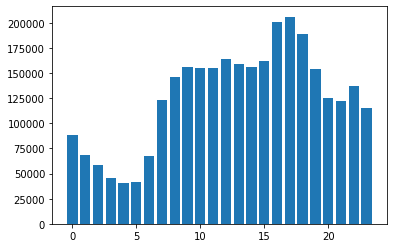

In [20]:
plt.bar(calls['call_hour'].value_counts().index,calls['call_hour'].value_counts());

In [21]:
hours_to_cat = {"call_hour":{1:"late_night",2:"late_night",3:"late_night",4:"late_night",5:"late_night",6:"late_night",
                                 7:"day",8:"day",9:"day",10:"day",11:"day",12:"day",13:"day",14:"day",15:"day",
                                  16:"late_afternoon",17:"late_afternoon",18:"late_afternoon",19:"late_afternoon",
                             20:"evening",21:"evening",22:"evening",23: "evening", 24: "evening"
                            }}

In [22]:
calls.replace(hours_to_cat, inplace=True);

In [23]:
calls['call_hour_int'] = calls['Call Time'].apply(lambda x: int(x[:2]))

**No difference between Offense Date, Report Date and Call Date**

In [24]:
(calls['Report Date'] - calls['Offense Date']).value_counts()

0 days    3035330
dtype: int64

In [25]:
(calls['Offense Date'] - calls['Call Date']).value_counts()

0 days    3035330
dtype: int64

In [26]:
calls['day_of_week'] = calls['Call Date'].apply(lambda x: x.dayofweek)

In [27]:
calls['day_of_week'].value_counts(1)

2    0.148517
4    0.145539
3    0.145057
1    0.144624
5    0.142189
0    0.141405
6    0.132669
Name: day_of_week, dtype: float64

In [28]:
int_to_dow = {"day_of_week":{0:"Mon",1:"Tue",2:"Wed",4:"Fri",5:"Sat",6:"Sun"
                            }}

In [29]:
calls.replace(int_to_dow, inplace = True)

In [30]:
calls['day_of_month'] = calls['Call Date'].apply(lambda x: x.day)

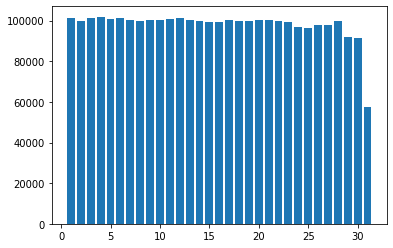

In [31]:
plt.bar(calls['day_of_month'].value_counts().index,calls['day_of_month'].value_counts());

In [32]:
calls.loc[calls['day_of_month'] <= 10, 'day_of_month_cat'] = 'beginning'

In [33]:
mid_month = list(np.arange(10,21))

In [34]:
calls.loc[calls['day_of_month'].isin(mid_month), 'day_of_month_cat'] = 'mid'

In [35]:
end_month = list(np.arange(21,32))
end_month

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [36]:
calls.loc[calls['day_of_month'].isin(end_month), 'day_of_month_cat'] = 'end'

In [65]:
(~calls['Common Location'].isnull())*1

0          0
1          0
2          0
3          0
4          1
          ..
3035325    0
3035326    0
3035327    0
3035328    0
3035329    0
Name: Common Location, Length: 3035330, dtype: int64

In [66]:
calls['common_loc_bool'] = (~calls['Common Location'].isnull()) * 1 

In [67]:
calls['common_loc_bool'].value_counts()

0    2708815
1     326515
Name: common_loc_bool, dtype: int64

In [ ]:
calls

## Feature enginnering

In [70]:
def convert_to_bool(df, col_list):
    for i in col_list:
        df['is_{}'.format(i)] = (~df[i].isnull()) * 1 
    return df

In [37]:
def dummify(df, col_list):
    '''dummify categorical features.
    '''
    for col in col_list:
        if df[col].isnull().sum() == 0:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        else:
            dummies = pd.get_dummies(
                df[col], prefix=col, dummy_na=True, drop_first=True)
        df[dummies.columns] = dummies
    return df

In [38]:
def drop_cols (df, col_list):
    df = df.drop(col_list, axis=1)
    return df 

In [39]:
def crime_type_encoding(df, crime_type_names):
    for i in crime_type_names:
        df["crime_type_{}".format(i)] = np.where(df["Original Crime Type Name"].str.contains(i), 1, 0)
    return df 

In [40]:
def dispo_type_encoding(df, dispo_types):
    for i in dispo_types:
        df["disposition_{}".format(i)] = np.where(df["Disposition"].str.contains(i), 1, 0)
    return df 

In [71]:
def feature_enginner(df, cols_bool, cols_dummy, cols_to_drop, crime_type_names, dispo_types):
    df2 = convert_to_bool(df,cols_bool)
    df2 = crime_type_encoding(df,crime_type_names)
    df2 = dispo_type_encoding(df,dispo_types)
    df2 = dummify(df,cols_dummy)
    df2 = drop_cols(df, cols_to_drop)
#     scaler = StandardScaler()
#     scaler.fit(df.values)
#     X = scaler.transform(df.values)
    return df2

In [63]:
useless_cols = ['State','Agency Id','City', 'Crime Id','Report Date','Offense Date']
engineered_cols = ['Original Crime Type Name','call_hour_int','day_of_month','Call Time',
                   'Call Date','Call Date Time','Disposition',
                  'call_hour','day_of_week','day_of_month_cat',
                  'Address Type', 'Common Location']
unused_col = ['Address']
calls_drop_features = useless_cols + engineered_cols + unused_col

In [43]:
calls_dummy_features = ['Address Type','call_hour','day_of_week','day_of_month_cat']

In [44]:
crime_type_names = ['Passing Call','Traffic Stop','Suspicious Person','Homeless Complaint'] #

In [45]:
dispo_types = ['HAN','GOA','CIT','ADV','REP','Not recorded']

In [72]:
bools_cols = ['Common Location']

In [73]:
calls_fe = feature_enginner(calls, bools_cols, calls_dummy_features, calls_drop_features, crime_type_names, dispo_types)

In [77]:
calls_fe.tail(10).transpose()

,3035320,3035321,3035322,3035323,3035324,3035325,3035326,3035327,3035328,3035329
crime_type_Passing Call,0,0,0,0,0,0,0,0,0,0
crime_type_Traffic Stop,0,0,0,0,0,0,0,0,0,0
crime_type_Suspicious Person,0,0,0,0,0,0,0,0,0,0
crime_type_Homeless Complaint,0,0,1,1,0,0,0,0,1,0
disposition_HAN,0,0,1,0,0,0,0,0,0,0
disposition_GOA,0,0,0,0,1,0,1,1,1,0
disposition_CIT,0,0,0,0,0,0,0,0,0,0
disposition_ADV,1,0,0,1,0,0,0,0,0,0
disposition_REP,0,0,0,0,0,1,0,0,0,1
disposition_Not recorded,0,0,0,0,0,0,0,0,0,0


## Clustering for Calls - PCA + Kmeans

**mention alternatives: hieratical, and the challenge here about the high demensionality brought by categorical features**

In [48]:
from sklearn.cluster import KMeans 

In [94]:
from sklearn.decomposition import PCA

In [105]:
from scipy import stats
from collections import Counter
from sklearn import metrics
from time import time

In [81]:
calls = pd.read_csv("police-department-calls-for-service.csv",parse_dates = ['Report Date','Call Date','Offense Date','Call Date Time'])
calls.columns = [col.strip() for col in calls.columns] 

In [82]:
useless_cols

['State', 'Agency Id', 'City', 'Crime Id', 'Report Date', 'Offense Date']

In [84]:
cluster_df = calls.drop(useless_cols,axis = 1)

In [86]:
cluster_df.head()

,Original Crime Type Name,Call Date,Call Time,Call Date Time,Disposition,Address,Address Type,Common Location
0,Passing Call,2019-11-23,23:54,2019-11-23 23:54:00,HAN,1000 Block Of Larkin St,Premise Address,NaN
1,Fight No Weapon,2019-11-23,23:45,2019-11-23 23:45:00,CAN,100 Block Of Ocean Av,Premise Address,NaN
2,Passing Call,2019-11-23,23:51,2019-11-23 23:51:00,HAN,400 Block Of Duboce Av,Premise Address,NaN
3,Well Being Check,2019-11-23,23:50,2019-11-23 23:50:00,HAN,King St/4th St,Intersection,NaN
4,Passing Call,2019-11-23,23:50,2019-11-23 23:50:00,HAN,100 Block Of Scott St,Common Location,"Duboce Park, Sf"


In [89]:
def convert_to_cat (df, cols):
    for i in cols:
        df[i] = df[i].astype('category')
    return df

In [90]:
cluster_df = convert_to_cat(cluster_df, ['Original Crime Type Name','Address Type','Disposition'])

In [91]:
cluster_df.head()

,Original Crime Type Name,Call Date,Call Time,Call Date Time,Disposition,Address,Address Type,Common Location
0,Passing Call,2019-11-23,23:54,2019-11-23 23:54:00,HAN,1000 Block Of Larkin St,Premise Address,NaN
1,Fight No Weapon,2019-11-23,23:45,2019-11-23 23:45:00,CAN,100 Block Of Ocean Av,Premise Address,NaN
2,Passing Call,2019-11-23,23:51,2019-11-23 23:51:00,HAN,400 Block Of Duboce Av,Premise Address,NaN
3,Well Being Check,2019-11-23,23:50,2019-11-23 23:50:00,HAN,King St/4th St,Intersection,NaN
4,Passing Call,2019-11-23,23:50,2019-11-23 23:50:00,HAN,100 Block Of Scott St,Common Location,"Duboce Park, Sf"


### PCA

In [113]:
# calls_fe = calls_fe.drop('common_loc_bool', axis=1)

In [111]:
calls_fe.head()

,crime_type_Passing Call,crime_type_Traffic Stop,crime_type_Suspicious Person,crime_type_Homeless Complaint,disposition_HAN,disposition_GOA,disposition_CIT,disposition_ADV,disposition_REP,disposition_Not recorded,...,call_hour_late_night,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Tue,day_of_week_Wed,day_of_month_cat_end,day_of_month_cat_mid,is_Common Location
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [112]:
scaler = StandardScaler()
scaler.fit(calls_fe.values)
X = scaler.transform(calls_fe.values)

In [114]:
X.shape

(3035330, 26)

In [115]:
def PCA_reduce(X,dimensionality):
    '''[summary]
    reduced n dimensionality matrix and np array of important features
    Arguments:
        X {[numpy matrix]} -- input matrix
        dimensionality {[int]} -- to what dimensionality to reduce to
    Returns:
        X_reduced -- reduced matrix
        important_features -- a list of features that contributed most to the principle component
    '''

    important_features = []
    pcd = PCA(dimensionality).fit(X)
    pca_matrix = pcd.components_
    for i in range(dimensionality):
        print('#{} Principle Component top 5 contributors are:'.format(i), np.argsort(np.abs(pca_matrix[i,:]))[-5:])
        important_features.append(np.argsort(np.abs(pca_matrix[i,:]))[-5:])
    X_reduced = np.dot(X,pcd.components_.T)
    print('Reduced X shape:', X_reduced.shape)
    important_features = np.array(important_features)
    print('Explained variance:', pcd.explained_variance_)
    print('Explained variance ratio:', pcd.explained_variance_ratio_)
    print('Explained variance ratio accumulated:', pcd.explained_variance_ratio_.cumsum())
    return X_reduced, important_features


In [122]:
important_features = []
pcd = PCA(10).fit(X)
pca_matrix = pcd.components_
for i in range(10):
    print('#{} Principle Component top 5 contributors are:'.format(i), np.argsort(np.abs(pca_matrix[i,:]))[-5:])
    important_features.append(np.argsort(np.abs(pca_matrix[i,:]))[-5:])
re_X_ww = np.dot(X,pcd.components_.T)
print('Reduced X shape:', re_X_ww.shape)

imp_f_ww = np.array(important_features)
print('Explained variance:', pcd.explained_variance_)
print('Explained variance ratio:', pcd.explained_variance_ratio_)
print('Explained variance ratio accumulated:', pcd.explained_variance_ratio_.cumsum())


#0 Principle Component top 5 contributors are: [25  9 11  0 12]
#1 Principle Component top 5 contributors are: [ 4  0  6 11  1]
#2 Principle Component top 5 contributors are: [ 3 16 14 15 13]
#3 Principle Component top 5 contributors are: [13 18 17 24 23]
#4 Principle Component top 5 contributors are: [ 2 16  3  6  7]
#5 Principle Component top 5 contributors are: [ 5 15  9  4 14]
#6 Principle Component top 5 contributors are: [22 19  4 15 14]
#7 Principle Component top 5 contributors are: [20 17 19 22 21]
#8 Principle Component top 5 contributors are: [16 18 17 20 22]
#9 Principle Component top 5 contributors are: [ 8 17 19 21 18]
Reduced X shape: (3035330, 10)
Explained variance: [2.23002721 2.12962794 1.59237866 1.54041515 1.37423074 1.29696093
 1.21499597 1.1717583  1.16876352 1.16741343]
Explained variance ratio: [0.08577025 0.08190874 0.06124531 0.05924672 0.05285501 0.0498831
 0.0467306  0.04506761 0.04495243 0.0449005 ]
Explained variance ratio accumulated: [0.08577025 0.167678

Text(0, 0.5, 'Accumulated Explained Variance')

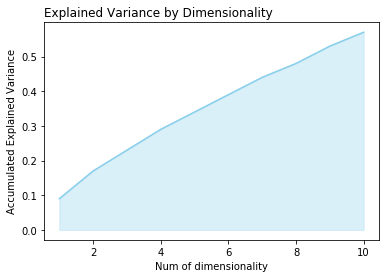

In [123]:
# Plot explained variance by dimensionality
x = range(1,11)
y = np.round(pcd.explained_variance_ratio_.cumsum(),2)
plt.fill_between(x, y, color="skyblue", alpha=0.3)
plt.plot(x, y, color="skyblue")
 
# Add titles and labels
plt.title("Explained Variance by Dimensionality", loc="left")
plt.xlabel("Num of dimensionality")
plt.ylabel("Accumulated Explained Variance")

In [124]:
pcd = PCA(6).fit(X) #re-assign PCA class to reduce to 6 dimensionality

In [125]:
re_X_ww = re_X_ww[:,:6] #cut dimensiontly from 10 to 6

In [126]:
def print_imp_features(df,imp_features):
    '''[summary]
    print important features names and return the counter of the features
    Arguments:
        df {[pandas dataframe]} -- input
        imp_features {[list]} -- important features returned from pca_reduce function
    Returns:
        counter [dictionary] -- a dictionary with feature name as key, and frequency showed as value 
    '''

    feature = []
    idx = 0
    c = 1
    while idx < len(np.array(imp_features).flatten()):
        print('#{} PC:'.format(c))
        if idx+5 > len(np.array(imp_features).flatten()):
            for i in np.array(imp_features).flatten()[idx:]:
                feature.append(list(df.columns)[i])
                print(list(df.columns)[i])
        else:
            for i in np.array(imp_features).flatten()[idx:idx+5]:
                feature.append(list(df.columns)[i])
                print(list(df.columns)[i])
        idx += 5
        c +=1
    counter = Counter(feature)
    return counter

In [127]:
# print out top 5 contributers for each principle component to understand what features are providing signals
counter = print_imp_features(calls_fe,imp_f_ww[:6,:])

#1 PC:
is_Common Location
disposition_Not recorded
Address Type_Intersection
crime_type_Passing Call
Address Type_Premise Address
#2 PC:
disposition_HAN
crime_type_Passing Call
disposition_CIT
Address Type_Intersection
crime_type_Traffic Stop
#3 PC:
crime_type_Homeless Complaint
call_hour_late_night
call_hour_evening
call_hour_late_afternoon
call_hour_day
#4 PC:
call_hour_day
day_of_week_Mon
day_of_week_Fri
day_of_month_cat_mid
day_of_month_cat_end
#5 PC:
crime_type_Suspicious Person
call_hour_late_night
crime_type_Homeless Complaint
disposition_CIT
disposition_ADV
#6 PC:
disposition_GOA
call_hour_late_afternoon
disposition_Not recorded
disposition_HAN
call_hour_evening


### We will use 3 dimensionality here for visualization purpose.

In [128]:
re_X_3 = re_X_ww[:,:3]

In [132]:
from mpl_toolkits.mplot3d import Axes3D

In [133]:
def matplotlib_3D_X_reduced(X_reduced,label1="First Principle Component",label2="Second Principle Component",label3="Third Principle Component",title="Scatterplot in PCA 3D-Plane"):
    '''use matplotlib to plot the 3D PCA results'''
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    # for c, m in [('r', 'o'), ('b', '^')]:
    xs=X_reduced[:,0]
    ys=X_reduced[:,1]
    zs=X_reduced[:,2]
    ax.scatter(xs, ys, zs, c='green', marker='^')
    ax.set_xlabel(label1)
    ax.set_ylabel(label2)
    ax.set_zlabel(label3)
    ax.set_title(title)
    plt.show()

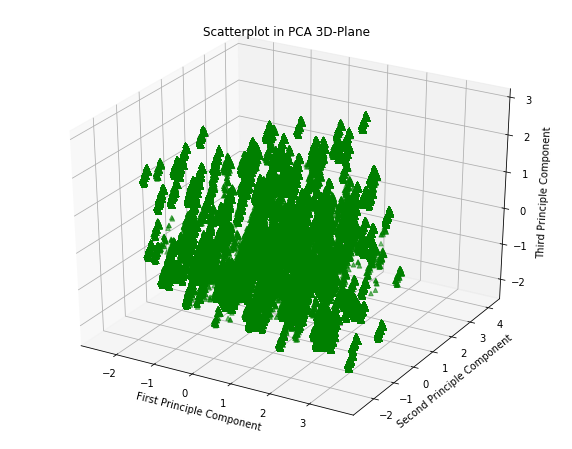

In [134]:
matplotlib_3D_X_reduced(re_X_3)

### KMeans modeling

In [135]:
def kmeans_cluster(X_reduced,cluster_num):
    '''[summary]
    use kmeans++ algorithems to cluster input data.
    Arguments:
        X_reduced {[numpy matrix]} -- input matrix
        cluster_num {[int]} -- how many clusters for clustering 
    Returns:
        y[numpy array] -- assigned_cluster for each row
        centers[numpy matrix] -- centers of the clusters
    '''

    kmeans = KMeans(init='k-means++', n_clusters=cluster_num, n_init=10,tol=0.0001,verbose=0)
    y = kmeans.fit_predict(X_reduced)
    centers = kmeans.cluster_centers_
    # assigned_cluster = kmeans.transform(X_reduced).argmin(axis=1)
    return y, centers

In [136]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10,tol=0.0001,verbose=0)
y = kmeans.fit_predict(re_X_ww)
centers = kmeans.cluster_centers_


In [138]:
y

array([3, 5, 3, ..., 5, 1, 5], dtype=int32)

In [139]:
calls_fe['clustering_6d'] = y

In [137]:
def plot_3D_kmeans(X_reduced,y,xlabel,ylabel,zlabel,title,xlim=None,ylim=None,zlim=None):
    '''use matplotlib to plot the 3D kmeans cluster results'''
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    # for c, m in [('r', 'o'), ('b', '^')]:
    xs=X_reduced[:,0]
    ys=X_reduced[:,1]
    zs=X_reduced[:,2]
    ax.scatter(xs, ys, zs, c=y, marker='^')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    if xlim != None:
        ax.set_xlim(xlim[0],xlim[1])
    if ylim != None:
        ax.set_ylim(ylim[0],ylim[1])
    if zlim != None:
        ax.set_zlim(zlim[0],zlim[1])
    plt.show()

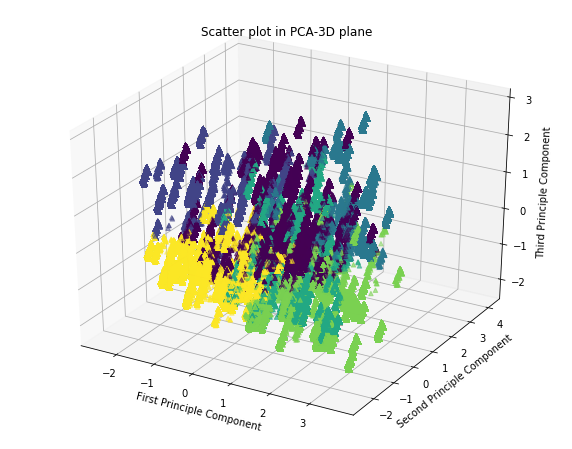

In [140]:
plot_3D_kmeans(re_X_3,y,"First Principle Component","Second Principle Component","Third Principle Component",'Scatter plot in PCA-3D plane')

In [142]:
calls_fe.head().transpose()

,0,1,2,3,4
crime_type_Passing Call,1,0,1,0,1
crime_type_Traffic Stop,0,0,0,0,0
crime_type_Suspicious Person,0,0,0,0,0
crime_type_Homeless Complaint,0,0,0,0,0
disposition_HAN,1,0,1,1,1
disposition_GOA,0,0,0,0,0
disposition_CIT,0,0,0,0,0
disposition_ADV,0,0,0,0,0
disposition_REP,0,0,0,0,0
disposition_Not recorded,0,0,0,0,0


In [145]:
def count_rows(x):
    return len(x)

In [147]:
calls_fe.groupby('clustering_6d').apply(count_rows) * 1.0 /calls_fe.shape[0]

clustering_6d
0    0.185986
1    0.244617
2    0.072642
3    0.113140
4    0.126771
5    0.256845
dtype: float64

### Interpretation on Kmeans clusters for calls

In [148]:
scaled_centers = pcd.inverse_transform(centers)

In [149]:
scaler = StandardScaler().fit(calls_fe.iloc[:,:-1])

In [150]:
engineered_centers = scaler.inverse_transform(scaled_centers)

In [152]:
center_person = pd.DataFrame(engineered_centers,columns=calls_fe.columns[:-1])

In [154]:
center_person.transpose()

,0,1,2,3,4,5
crime_type_Passing Call,0.049870,0.022890,-0.024252,0.684263,0.459086,-0.004575
crime_type_Traffic Stop,0.173711,0.019736,0.781735,-0.033396,0.038604,-0.005178
crime_type_Suspicious Person,0.183270,0.039682,-0.039690,-0.039764,0.061427,0.022030
crime_type_Homeless Complaint,0.180555,0.065729,-0.083268,0.024114,-0.023648,0.013683
disposition_HAN,0.224684,0.192691,0.061772,0.922535,0.214140,0.223577
disposition_GOA,0.112442,0.227826,-0.082235,-0.084988,0.080706,0.226396
disposition_CIT,0.039145,0.135853,0.812631,-0.066847,0.023493,0.082508
disposition_ADV,0.432617,0.051579,0.044958,-0.054128,0.030024,0.034727
disposition_REP,0.006431,0.137535,0.050057,-0.008696,0.095272,0.121577
disposition_Not recorded,0.028999,0.007063,-0.004633,0.185982,0.419431,-0.001784


# Incidents Data

In [156]:
incidents = pd.read_csv('police-department-incidents.csv',parse_dates=['Date'])

print(incidents.shape)

incidents.head()

(2215024, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,2018-05-15,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,37.775207,"{'type': 'Point', 'coordinates': [-122.4119120...",18036228907023
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,2018-05-15,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.419258,37.775146,"{'type': 'Point', 'coordinates': [-122.4192578...",18036094864020
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087926150
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087965010
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,2018-05-15,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,37.757101,"{'type': 'Point', 'coordinates': [-122.4178125...",18036087965015


In [157]:
incidents['year'] = incidents['Date'].apply(lambda x: x.year)

incidents['month'] = incidents['Date'].apply(lambda x: x.month)

incidents['day_of_month'] = incidents['Date'].apply(lambda x: x.day)

incidents['hour'] = incidents['Time'].apply(lambda x: pd.to_datetime(x, format='%H:%M').hour)

In [292]:
from uszipcode import Zipcode

In [295]:
from uszipcode import SearchEngine

In [297]:
search = SearchEngine(simple_zipcode=False)

Start downloading data for rich info zipcode database, total size 450+MB ...
  10 MB finished ...
  20 MB finished ...
  30 MB finished ...
  40 MB finished ...
  50 MB finished ...
  60 MB finished ...
  70 MB finished ...
  80 MB finished ...
  90 MB finished ...
  100 MB finished ...
  110 MB finished ...
  120 MB finished ...
  130 MB finished ...
  140 MB finished ...
  150 MB finished ...
  160 MB finished ...
  170 MB finished ...
  180 MB finished ...
  190 MB finished ...
  200 MB finished ...
  210 MB finished ...
  220 MB finished ...
  230 MB finished ...
  240 MB finished ...
  250 MB finished ...
  260 MB finished ...
  270 MB finished ...
  280 MB finished ...
  290 MB finished ...
  300 MB finished ...
  310 MB finished ...
  320 MB finished ...
  330 MB finished ...
  340 MB finished ...
  350 MB finished ...
  360 MB finished ...
  370 MB finished ...
  380 MB finished ...
  390 MB finished ...
  400 MB finished ...
  410 MB finished ...
  420 MB finished ...
  430 MB

In [300]:
results = search.by_coordinates(39.122229, -77.133578, radius=30, returns=5)

In [301]:
import geopy

In [316]:
from geopy.point import Point

In [377]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse(Point(df[lat_field], df[lon_field]))
    if 'postcode' in list(location.raw['address'].keys()):
        return location.raw['address']['postcode']
    else:
        return 'NA'

In [375]:
geolocator = geopy.Nominatim(user_agent='my-application',timeout = 100)

In [341]:
zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

{'amenity': 'Burbank High School',
 'road': 'Fairmont',
 'neighbourhood': 'Blue Star',
 'city': 'San Antonio',
 'county': 'Bexar County',
 'state': 'Texas',
 'postcode': '78204',
 'country': 'United States of America',
 'country_code': 'us'}

In [324]:
zipcodes_csv = pd.read_csv('zipcode.csv')

In [325]:
zipcodes_csv.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [357]:
t = zipcodes_csv[zipcodes_csv['LNG'] < -122.36]

In [366]:
sf_zipcodes = t[t['LAT'] > 37.7][t[t['LAT'] > 37.7]['LAT']<37.84]

In [369]:
sf_zipcodes['LNG'].min()

-122.494707

In [372]:
sf_zipcodes

,ZIP,LAT,LNG
30987,94102,37.779588,-122.419318
30988,94103,37.773134,-122.411167
30989,94104,37.791409,-122.402130
30990,94105,37.789864,-122.393665
30991,94107,37.760460,-122.399724
30992,94108,37.792007,-122.408575
30993,94109,37.795388,-122.422453
30994,94110,37.750021,-122.415201
30995,94111,37.799367,-122.398407
30996,94112,37.720375,-122.442950


In [370]:
sf_zipcodes.shape

(27, 3)

In [371]:
incidents['X'].apply(lambda x: if x )

0         -122.411912
1         -122.419258
2         -122.417813
3         -122.417813
4         -122.417813
              ...    
2215019   -122.435517
2215020   -122.424037
2215021   -122.443835
2215022   -122.397590
2215023   -122.403405
Name: X, Length: 2215024, dtype: float64

In [381]:
thefts = crimes[crimes['Category'] == 'LARCENY/THEFT']

In [382]:
thefts.shape

(480448, 18)

In [383]:
zipcodes = thefts[['X','Y']].apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Y', lon_field='X')

GeocoderServiceError: 60

#### We have visibility from 2003 to 2018 crime records. 

- Are these records complete and continous?
- Are categories consistent across all years?


In [158]:
print(incidents['Date'].max())
print(incidents['Date'].min())

2018-05-15 00:00:00
2003-01-01 00:00:00


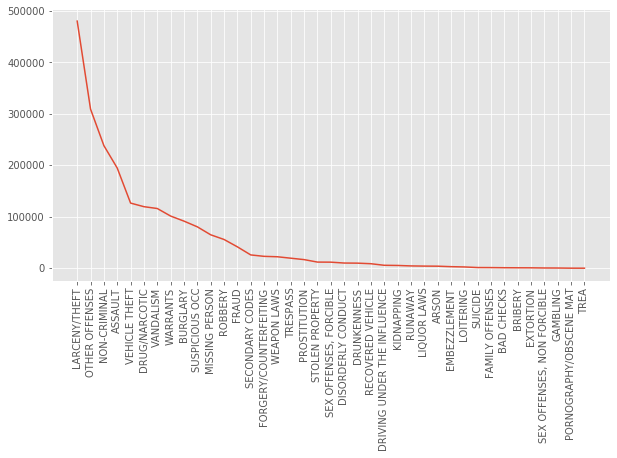

In [162]:
figure =figsize(10,5)
plt.plot(incidents['Category'].value_counts())
xticks(rotation = '90');

In [167]:
#### Across all years, top 4 crime categories take 55% of all records. Top 13 categories take 91% of all records.
sum(incidents['Category'].value_counts()[:4]) *1.0 /sum(incidents['Category'].value_counts())

0.5520585781463316

In [164]:
incidents['Category'].value_counts()[:13]

LARCENY/THEFT     480448
OTHER OFFENSES    309358
NON-CRIMINAL      238323
ASSAULT           194694
VEHICLE THEFT     126602
DRUG/NARCOTIC     119628
VANDALISM         116059
WARRANTS          101379
BURGLARY           91543
SUSPICIOUS OCC     80444
MISSING PERSON     64961
ROBBERY            55867
FRAUD              41542
Name: Category, dtype: int64

In [166]:
sum (incidents['Category'].value_counts()[:13]) * 1.0 / sum(incidents['Category'].value_counts())

0.912336841496977

#### How are crimes categories trending over the years?  

**From heatmap overview on Top13 categories** 
- Theft has increased significantly over the years
- Non-criminal has increased 

- Vehicle theft as decreased over the years


In [168]:
top_categories = list(incidents['Category'].value_counts()[:13].index)

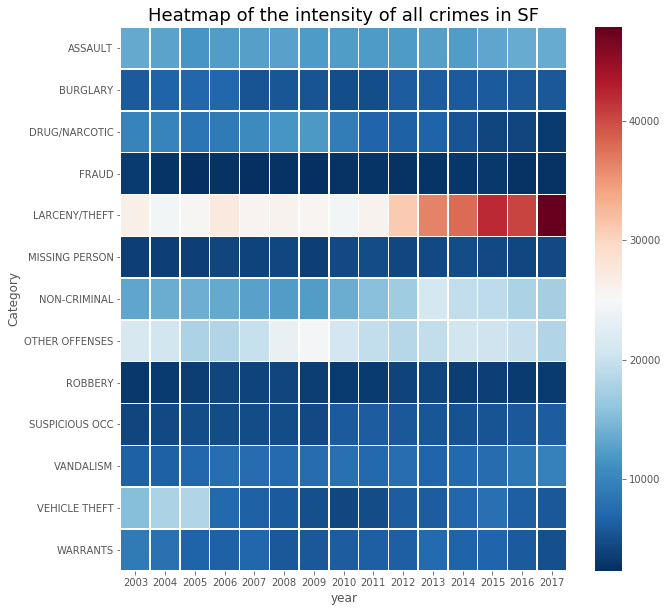

In [169]:
mask_year = incidents['year'] <= 2017
n_crime_year = incidents[mask_year][['Category', 'year']]
n_crime = n_crime_year[n_crime_year['Category'].apply(lambda x: x in top_categories)]
m = n_crime.groupby(['Category', 'year']).apply(lambda x: len(x)).unstack()
figure = figsize(10, 10)

sns.heatmap(m, cmap='RdBu_r', linewidth=0.5);
title('Heatmap of the intensity of all crimes in SF', fontsize = 18);

In [172]:
#### What are inside Non-criminal(no.3) and Other offenses(no.2) ? 

top_cat_inci = incidents[incidents['Category'].apply (lambda x: x in top_categories)]

tmp = top_cat_inci[['Category','Descript']].groupby(['Category','Descript']).apply(lambda x: len(x)).unstack()

1.0

In [173]:
top_cat_inci[top_cat_inci['Category'] == 'NON-CRIMINAL']['Descript'].value_counts(1)

LOST PROPERTY                                         0.327102
AIDED CASE, MENTAL DISTURBED                          0.236289
FOUND PROPERTY                                        0.140075
AIDED CASE                                            0.059793
DEATH REPORT, CAUSE UNKNOWN                           0.045044
CASE CLOSURE                                          0.025264
STAY AWAY OR COURT ORDER, NON-DV RELATED              0.018089
AIDED CASE, DOG BITE                                  0.014866
CIVIL SIDEWALKS, CITATION                             0.012756
PROPERTY FOR IDENTIFICATION                           0.011652
AIDED CASE, INJURED PERSON                            0.011279
COURTESY REPORT                                       0.010347
DEATH REPORT, NATURAL CAUSES                          0.009810
CIVIL SIDEWALKS, WARNING                              0.009722
AIDED CASE -PROPERTY FOR DESTRUCTION                  0.009722
FIRE REPORT                                           0

In [176]:
top_cat_inci[top_cat_inci['Category'] == 'NON-CRIMINAL'].groupby('year').apply(count_rows)

year
2003    13149
2004    13778
2005    14055
2006    13368
2007    12677
2008    12303
2009    12395
2010    13877
2011    15586
2012    16936
2013    21084
2014    19404
2015    19177
2016    17919
2017    17368
2018     5247
dtype: int64

In [178]:
top_cat_inci[top_cat_inci['Category'] == 'OTHER OFFENSES']['Descript'].value_counts(1)

DRIVERS LICENSE, SUSPENDED OR REVOKED                  0.202141
TRAFFIC VIOLATION                                      0.123174
RESISTING ARREST                                       0.069415
MISCELLANEOUS INVESTIGATION                            0.065358
PROBATION VIOLATION                                    0.058444
                                                         ...   
VIOLATION OF CALIF UNEMPLOYMENT INSURANCE ACT          0.000003
HAZARDOUS MATERIALS, TRANSPORT WITHOUT PERMIT          0.000003
REFUSAL TO IDENTIFY                                    0.000003
UNSOLICITED FAX ADVERTISING                            0.000003
PERMIT VIOLATION, ADVERTISING HANDBILL DISTRIBUTION    0.000003
Name: Descript, Length: 179, dtype: float64

In [180]:
top_cat_inci[top_cat_inci['Category'] == 'LARCENY/THEFT']['Descript'].value_counts(1)[:10]

GRAND THEFT FROM LOCKED AUTO      0.372228
PETTY THEFT FROM LOCKED AUTO      0.108120
PETTY THEFT OF PROPERTY           0.095981
GRAND THEFT OF PROPERTY           0.061235
PETTY THEFT FROM A BUILDING       0.053550
PETTY THEFT SHOPLIFTING           0.050948
GRAND THEFT FROM A BUILDING       0.046838
GRAND THEFT FROM PERSON           0.037713
GRAND THEFT FROM UNLOCKED AUTO    0.032309
GRAND THEFT PICKPOCKET            0.028411
Name: Descript, dtype: float64

In [188]:
day_of_week_convert = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [190]:
incidents['day_of_week_int'] = incidents['DayOfWeek'].replace(day_of_week_convert)

In [223]:
crimes = incidents[incidents['Category']!= 'NON-CRIMINAL']

In [225]:
crimes.shape

(1976701, 18)

In [226]:
crimes.shape[0]*1.0/incidents.shape[0]

0.8924061319425884

## Non-Criminals deep dive

In [227]:
non_criminals = incidents[incidents['Category']== 'NON-CRIMINAL']

In [234]:
non_criminals['Descript'].value_counts(1)

LOST PROPERTY                                         0.327102
AIDED CASE, MENTAL DISTURBED                          0.236289
FOUND PROPERTY                                        0.140075
AIDED CASE                                            0.059793
DEATH REPORT, CAUSE UNKNOWN                           0.045044
CASE CLOSURE                                          0.025264
STAY AWAY OR COURT ORDER, NON-DV RELATED              0.018089
AIDED CASE, DOG BITE                                  0.014866
CIVIL SIDEWALKS, CITATION                             0.012756
PROPERTY FOR IDENTIFICATION                           0.011652
AIDED CASE, INJURED PERSON                            0.011279
COURTESY REPORT                                       0.010347
DEATH REPORT, NATURAL CAUSES                          0.009810
CIVIL SIDEWALKS, WARNING                              0.009722
AIDED CASE -PROPERTY FOR DESTRUCTION                  0.009722
FIRE REPORT                                           0

In [237]:
top_non_criminals_types = list((non_criminals['Descript'].value_counts(1)[:5]).index)

In [238]:
non_criminals_major = non_criminals[non_criminals['Descript'].apply(lambda x: x in top_non_criminals_types)]

In [241]:
non_criminals_major.shape[0]/non_criminals.shape[0]

0.8083021781363947

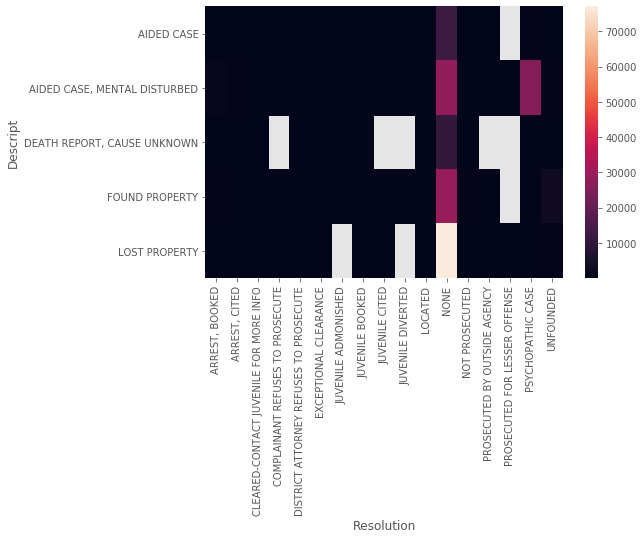

In [243]:
sns.heatmap(non_criminals_major.groupby(['Descript','Resolution']).apply(count_rows).unstack())

In [228]:
non_criminals['Resolution'].value_counts(1)

NONE                                      0.775662
PSYCHOPATHIC CASE                         0.113447
ARREST, BOOKED                            0.041989
UNFOUNDED                                 0.031067
ARREST, CITED                             0.013557
COMPLAINANT REFUSES TO PROSECUTE          0.006021
EXCEPTIONAL CLEARANCE                     0.003974
LOCATED                                   0.003739
NOT PROSECUTED                            0.003382
PROSECUTED BY OUTSIDE AGENCY              0.002006
DISTRICT ATTORNEY REFUSES TO PROSECUTE    0.001997
JUVENILE BOOKED                           0.001217
JUVENILE DIVERTED                         0.000843
JUVENILE ADMONISHED                       0.000449
CLEARED-CONTACT JUVENILE FOR MORE INFO    0.000340
JUVENILE CITED                            0.000290
PROSECUTED FOR LESSER OFFENSE             0.000021
Name: Resolution, dtype: float64

In [181]:
incidents['Resolution'].value_counts(1)

NONE                                      0.627307
ARREST, BOOKED                            0.237008
ARREST, CITED                             0.069881
LOCATED                                   0.015559
PSYCHOPATHIC CASE                         0.013176
UNFOUNDED                                 0.010744
JUVENILE BOOKED                           0.006392
COMPLAINANT REFUSES TO PROSECUTE          0.003652
DISTRICT ATTORNEY REFUSES TO PROSECUTE    0.003591
NOT PROSECUTED                            0.003485
JUVENILE CITED                            0.002974
PROSECUTED BY OUTSIDE AGENCY              0.002289
EXCEPTIONAL CLEARANCE                     0.001922
JUVENILE ADMONISHED                       0.001356
JUVENILE DIVERTED                         0.000313
CLEARED-CONTACT JUVENILE FOR MORE INFO    0.000311
PROSECUTED FOR LESSER OFFENSE             0.000038
Name: Resolution, dtype: float64

In [247]:
crimes = crimes.reset_index(drop=True)

Text(0.5, 1.0, "Distribution of Day_of_week for SF crimes '03-'18")

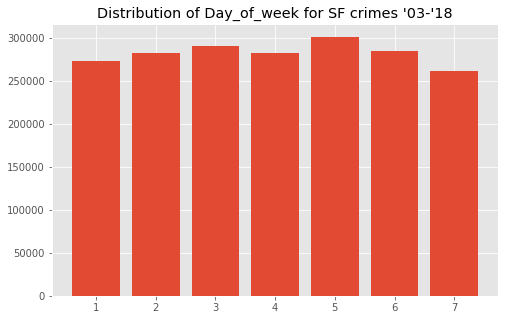

In [248]:
figure = figsize(8,5)
plt.bar(crimes['day_of_week_int'].value_counts().index,crimes['day_of_week_int'].value_counts());
plt.title("Distribution of Day_of_week for SF crimes '03-'18")

In [249]:
crimes['hour'].value_counts(1)

18    0.064833
17    0.061682
19    0.058310
12    0.058218
16    0.056214
15    0.053557
20    0.052959
22    0.052583
0     0.051753
21    0.050283
14    0.049787
23    0.048348
13    0.047970
11    0.042893
10    0.041765
9     0.039338
8     0.036495
1     0.030010
2     0.025285
7     0.024609
3     0.016433
6     0.014828
4     0.011642
5     0.010204
Name: hour, dtype: float64

Text(0.5, 1.0, "Distribution of Hour_of_Day for SF crimes '03-'18")

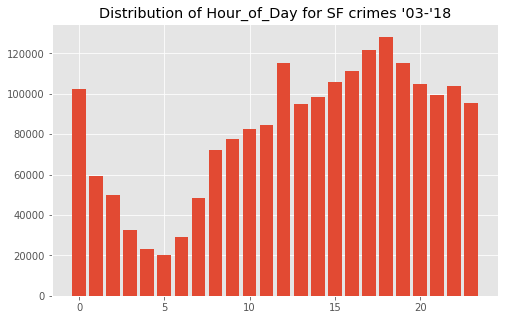

In [250]:
plt.bar(crimes['hour'].value_counts().index,crimes['hour'].value_counts());
plt.title("Distribution of Hour_of_Day for SF crimes '03-'18")

In [206]:
# hours_to_cat = {"call_hour":{1:"late_night",2:"late_night",3:"late_night",4:"late_night",5:"late_night",6:"late_night",
#                                  7:"day",8:"day",9:"day",10:"day",11:"day",12:"day",13:"day",14:"day",15:"day",
#                                   16:"late_afternoon",17:"late_afternoon",18:"late_afternoon",19:"late_afternoon",
#                              20:"evening",21:"evening",22:"evening",23: "evening", 24: "evening"
#                             }}

In [207]:
# calls.replace(hours_to_cat, inplace=True);

In [251]:
crimes.isnull().sum()

IncidntNum         0
Category           0
Descript           0
DayOfWeek          0
Date               0
Time               0
PdDistrict         1
Resolution         0
Address            0
X                  0
Y                  0
Location           0
PdId               0
year               0
month              0
day_of_month       0
hour               0
day_of_week_int    0
dtype: int64

Text(0.5, 1.0, "Count of SF crimes 03'Jan -18'May")

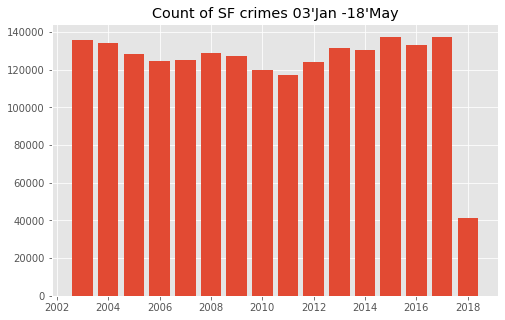

In [252]:
plt.bar(crimes['year'].value_counts().index,crimes['year'].value_counts())
plt.title("Count of SF crimes 03'Jan -18'May")

In [253]:
crimes['day_of_month'].value_counts(1)

1     0.038332
15    0.033897
20    0.033338
23    0.033185
28    0.032929
13    0.032835
17    0.032829
22    0.032778
16    0.032773
10    0.032758
19    0.032758
14    0.032704
12    0.032663
24    0.032661
18    0.032653
27    0.032647
21    0.032627
4     0.032557
5     0.032546
9     0.032523
3     0.032510
11    0.032502
6     0.032404
7     0.032386
8     0.032348
26    0.032338
25    0.032273
2     0.032105
29    0.030766
30    0.029559
31    0.018816
Name: day_of_month, dtype: float64

Text(0.5, 1.0, "Distribution of Day_of_Month for SF crimes 03'Jan -18'May")

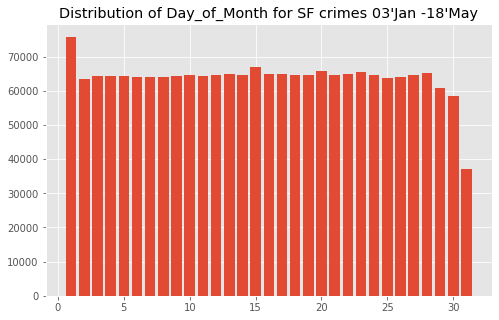

In [254]:
plt.bar(crimes['day_of_month'].value_counts().index, crimes['day_of_month'].value_counts());
plt.title("Distribution of Day_of_Month for SF crimes 03'Jan -18'May")

In [255]:
crimes['month'].value_counts(1)

1     0.089479
3     0.089156
10    0.086095
4     0.085687
5     0.084555
8     0.084528
9     0.082819
7     0.081868
2     0.080830
11    0.079176
6     0.078690
12    0.077117
Name: month, dtype: float64

Text(0.5, 1.0, "Distribution of Month_of_Year for SF crimes 03'Jan -18'May")

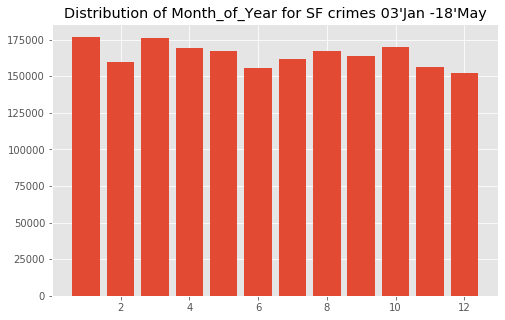

In [256]:
plt.bar(crimes['month'].value_counts().index,crimes['month'].value_counts());
plt.title("Distribution of Month_of_Year for SF crimes 03'Jan -18'May")

In [260]:
crimes[crimes['Category'] != "OTHER OFFENSES"].shape[0]/incidents.shape[0]

0.752742633939858

In [261]:
crimes_ex_traffic = crimes[crimes['Category'] != "OTHER OFFENSES"]

In [263]:
crimes_ex_traffic['Category'].values_counts()

LARCENY/THEFT                  0.288152
ASSAULT                        0.116769
VEHICLE THEFT                  0.075930
DRUG/NARCOTIC                  0.071748
VANDALISM                      0.069607
WARRANTS                       0.060803
BURGLARY                       0.054904
SUSPICIOUS OCC                 0.048247
MISSING PERSON                 0.038961
ROBBERY                        0.033507
FRAUD                          0.024915
SECONDARY CODES                0.015492
FORGERY/COUNTERFEITING         0.013824
WEAPON LAWS                    0.013335
TRESPASS                       0.011665
PROSTITUTION                   0.010017
STOLEN PROPERTY                0.007132
SEX OFFENSES, FORCIBLE         0.007042
DISORDERLY CONDUCT             0.006022
DRUNKENNESS                    0.005893
RECOVERED VEHICLE              0.005227
DRIVING UNDER THE INFLUENCE    0.003402
KIDNAPPING                     0.003206
RUNAWAY                        0.002663
LIQUOR LAWS                    0.002449


In [283]:
f = crimes_ex_traffic.groupby(['year','Category']).apply(count_rows).unstack()

In [284]:
f.reset_index(inplace=True)

In [285]:
f

Category,year,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,"SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,2003,293.0,13461.0,134.0,28.0,6047.0,886.0,289.0,9917.0,662.0,...,28.0,800.0,93.0,4196.0,NaN,1434.0,6448.0,15325.0,9079.0,1281.0
1,2004,280.0,12899.0,79.0,39.0,6753.0,814.0,244.0,9897.0,600.0,...,31.0,641.0,102.0,4489.0,NaN,1191.0,6496.0,17884.0,8114.0,1252.0
2,2005,231.0,11601.0,101.0,38.0,7071.0,687.0,196.0,8533.0,636.0,...,24.0,540.0,79.0,4693.0,NaN,1034.0,7013.0,18194.0,6708.0,1341.0
3,2006,240.0,12449.0,87.0,36.0,7004.0,521.0,266.0,9069.0,703.0,...,29.0,575.0,86.0,4775.0,NaN,1102.0,7688.0,7291.0,6498.0,1324.0
4,2007,246.0,12518.0,69.0,56.0,5454.0,581.0,313.0,10560.0,671.0,...,39.0,527.0,111.0,4800.0,NaN,1198.0,7566.0,6460.0,7105.0,1318.0
5,2008,248.0,12681.0,78.0,49.0,5679.0,789.0,408.0,11648.0,710.0,...,20.0,518.0,100.0,4751.0,NaN,1151.0,7342.0,6053.0,5798.0,1419.0
6,2009,222.0,12284.0,64.0,46.0,5379.0,956.0,579.0,11950.0,804.0,...,17.0,660.0,83.0,4627.0,NaN,1232.0,7604.0,5183.0,5764.0,1433.0
7,2010,209.0,12387.0,54.0,61.0,4966.0,827.0,458.0,9205.0,706.0,...,30.0,680.0,82.0,6004.0,2.0,1150.0,7934.0,4346.0,6187.0,1349.0
8,2011,203.0,12279.0,45.0,47.0,4987.0,762.0,470.0,6935.0,652.0,...,29.0,785.0,76.0,6207.0,NaN,1072.0,7243.0,4762.0,6311.0,1329.0
9,2012,237.0,12181.0,49.0,64.0,6243.0,704.0,421.0,6444.0,644.0,...,28.0,932.0,86.0,5860.0,2.0,1288.0,7808.0,6183.0,6300.0,1455.0


In [286]:
ten_top_crimes = crimes_ex_traffic['Category'].value_counts()[:10].index

In [287]:
ten_top_crimes

Index(['LARCENY/THEFT', 'ASSAULT', 'VEHICLE THEFT', 'DRUG/NARCOTIC',
       'VANDALISM', 'WARRANTS', 'BURGLARY', 'SUSPICIOUS OCC', 'MISSING PERSON',
       'ROBBERY'],
      dtype='object')

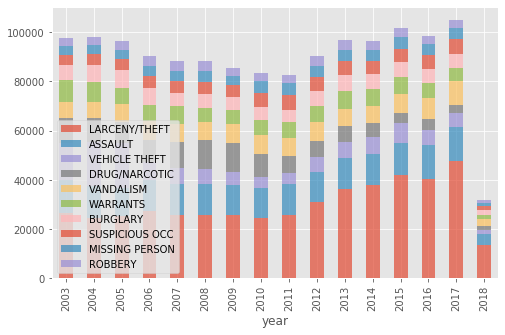

In [288]:
f.plot.bar(x='year',y=ten_top_crimes, stacked = True,alpha = 0.7)
legend();

In [32]:
calls.loc[calls['day_of_month'] <= 10, 'day_of_month_cat'] = 'beginning'

In [33]:
mid_month = list(np.arange(10,21))

In [34]:
calls.loc[calls['day_of_month'].isin(mid_month), 'day_of_month_cat'] = 'mid'

In [35]:
end_month = list(np.arange(21,32))
end_month

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [36]:
calls.loc[calls['day_of_month'].isin(end_month), 'day_of_month_cat'] = 'end'